# Plotly 차트

In [283]:
import pymysql
import pandas as pd
# 2. 데이터베이스 연결
db = pymysql.connect(host='localhost', port=3306, user='ctrlenter', password='0000', db='ctrlenter', charset='utf8')   # charset: 인코딩 설정

# 3. curosr 사용
cursor = db.cursor() 

sql = 'select * from 극안정형'
test = pd.read_sql(sql, db)

test.index = test['Date']

In [282]:
test.columns.tolist()

['Date',
 '단기채로그',
 '중기채로그',
 'ksp로그',
 'iau로그',
 'dbc로그',
 'vnq로그',
 'nsd로그',
 '상승',
 '코스피',
 '유동성기법',
 '레버리지기법',
 '그레이엄기법',
 '린치기법',
 '버핏기법',
 '삼대투자기법',
 '성장성기법',
 '수익성기법',
 '시장가치기법',
 '활동성기법',
 '단기채w',
 '중기채w',
 'kspw',
 'iauw',
 'dbcw',
 'vnqw',
 'nsdw',
 '금액',
 'kospi',
 '유동성추이',
 '레버리지추이',
 '성장성추이',
 '수익성추이',
 '시장가치추이',
 '활동성추이',
 '그레이엄추이',
 '린치추이',
 '버핏추이',
 '삼대투자추이']

In [284]:
def 투자유형별차트띄우기(투자유형):
    import pymysql
    import pandas as pd
    # 2. 데이터베이스 연결
    db = pymysql.connect(host='localhost', port=3306, user='ctrlenter', password='0000', db='ctrlenter', charset='utf8')   # charset: 인코딩 설정

    # 3. curosr 사용
    cursor = db.cursor() 

    sql = 'select * from '+투자유형
    test = pd.read_sql(sql, db)
    
    test.index = test['Date']
    test = test[['kospi', '유동성추이', '레버리지추이', '성장성추이',
           '수익성추이', '시장가치추이', '활동성추이', '그레이엄추이', '린치추이', '버핏추이', '삼대투자추이']]
    # print(test.columns.tolist())
    price_rank = test.iloc[-1].rank(method='min', ascending=False)
    price_rank = price_rank.sort_values(ascending=True)
    rank_index = price_rank.tolist()
    price_rank_name = price_rank.index.tolist()
    price_list = test.iloc[-1].sort_values(ascending=False).tolist()
    
    chart = test[price_rank_name[:4]]
    
    # making dual axis and defining categories
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    fig = make_subplots(specs=[[{"secondary_y": True}]])


    # creating first plot
    fig.add_trace(
        go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[0]], name=chart.columns.tolist()[0]),
        secondary_y=False,
    )

    # creating next plot
    fig.add_trace(
        go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[1]], name=chart.columns.tolist()[1]) , 
        secondary_y=True,
    )

    # creating next plot
    fig.add_trace(
        go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[2]], name=chart.columns.tolist()[2]) , 
        secondary_y=True,
    )
    # creating next plot
    fig.add_trace(
        go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[3]], name=chart.columns.tolist()[3]) , 
        secondary_y=True,
    )

    # # creating next plot
    # fig.add_trace(
    #     go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[4]], name=chart.columns.tolist()[4]) , 
    #     secondary_y=True,
    # )



    fig.update_layout(height=600, width=1000)
    fig.write_html('./차트test.html')
    fig.show()
    
    return rank_index, price_rank_name, price_list, chart


In [285]:
투자유형_list = ['극안정형','안정형','위험중립형','적극투자형','공격투자형']

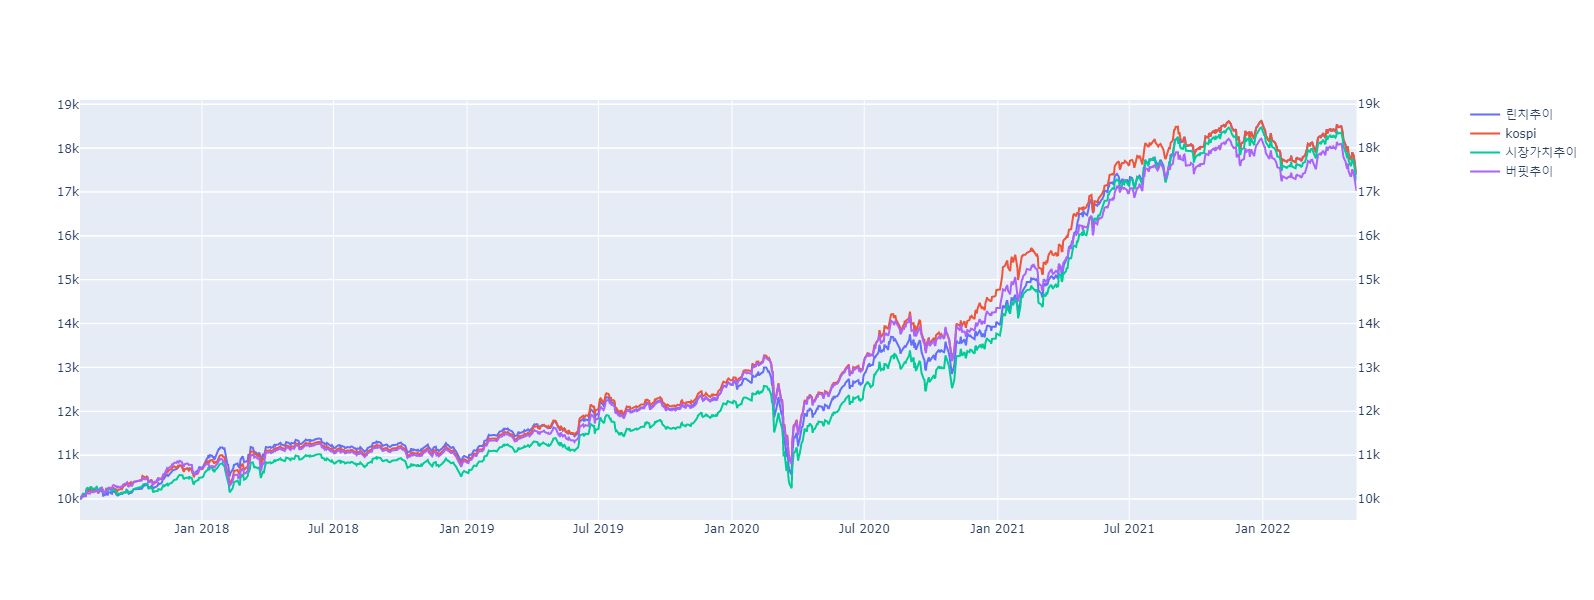

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
['린치추이', 'kospi', '시장가치추이', '버핏추이', '그레이엄추이', '유동성추이', '삼대투자추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
[17406.231952989514, 17395.222960284125, 17257.797839116793, 17018.682819912767, 16931.554241190057, 16854.23022214415, 16800.54017122906, 16478.885052064234, 16321.09725894556, 15904.03890400466, 15765.0828320697]


,린치추이,kospi,시장가치추이,버핏추이
Date,,,,
2017-07-17,10000.000000,10000.000000,10000.000000,10000.000000
2017-07-18,10007.491205,10018.317809,10006.359546,10015.458361
2017-07-19,10041.861236,10042.427534,10037.919553,10060.091762
2017-07-20,10037.722286,10057.788356,10065.816584,10068.371002
2017-07-21,10058.358117,10100.173963,10118.743022,10087.272096


In [290]:
rank_index, price_rank_name, price_list, chart  = 투자유형별차트띄우기(투자유형_list[4])
print(rank_index)
print(price_rank_name)
print(price_list)
chart.head()

In [33]:
import pymysql
import pandas as pd

# 2. 데이터베이스 연결
db = pymysql.connect(host='localhost', port=3306, user='ctrlenter', password='0000', db='ctrlenter', charset='utf8')   # charset: 인코딩 설정

# 3. curosr 사용
cursor = db.cursor() 

sql = 'select * from 전체가격데이터1'
test = pd.read_sql(sql, db)

In [34]:
test.index = test['Date']
test = test[['kospi', '유동성추이', '레버리지추이', '성장성추이',
       '수익성추이', '시장가치추이', '활동성추이', '그레이엄추이', '린치추이', '버핏추이', '삼대투자추이']]
# print(test.columns.tolist())
price_rank = test.iloc[-1].rank(method='min', ascending=False)
price_rank = price_rank.sort_values(ascending=True)
rank_index = price_rank.tolist()
price_rank_name = price_rank.index.tolist()
price_list = test.iloc[-1].sort_values(ascending=False).tolist()
print(rank_index)
print(price_rank_name)
print(price_list)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
['린치추이', '시장가치추이', 'kospi', '그레이엄추이', '삼대투자추이', '버핏추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
[12937.147163438996, 12876.35585813241, 12865.825351326328, 12740.533562382425, 12719.830564859589, 12710.426626566818, 12614.251283907251, 12470.011145738952, 12437.431151633727, 12249.80814722911, 12177.918938018043]


In [35]:
# ! pip install plotly 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


In [42]:
chart = test[price_rank_name[:4]]
chart

,린치추이,시장가치추이,kospi,그레이엄추이
Date,,,,
2017-07-17,10000.000000,10000.000000,10000.000000,10000.000000
2017-07-18,10003.328461,10002.748868,10008.873434,10014.570276
2017-07-19,10020.726043,10018.708765,10021.011651,10022.537013
2017-07-20,10016.525826,10030.884766,10026.777173,10034.503093
2017-07-21,10011.479331,10042.282181,10032.809509,10036.250847
...,...,...,...,...
2022-05-03,13115.540492,13053.910922,13043.235207,12916.215741
2022-05-04,13193.113753,13131.119668,13120.380810,12992.610074
2022-05-06,13162.436162,13100.586230,13089.872344,12962.398709


In [43]:
chart.columns.tolist()

['린치추이', '시장가치추이', 'kospi', '그레이엄추이']

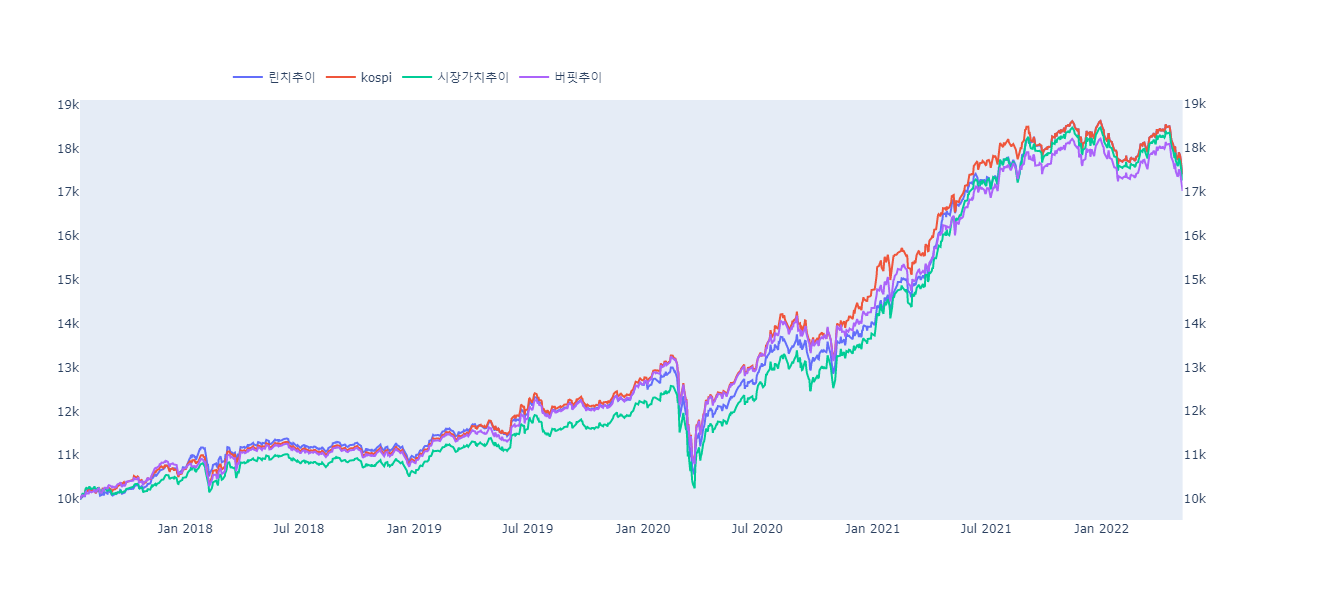

In [211]:
# making dual axis and defining categories
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fig = make_subplots(specs=[[{"secondary_y": True}]])

    
# creating first plot
fig.add_trace(
    go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[0]], name=chart.columns.tolist()[0]),
    secondary_y=False,
)

# creating next plot
fig.add_trace(
    go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[1]], name=chart.columns.tolist()[1]) , 
    secondary_y=True,
)

# creating next plot
fig.add_trace(
    go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[2]], name=chart.columns.tolist()[2]) , 
    secondary_y=True,
)
# creating next plot
fig.add_trace(
    go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[3]], name=chart.columns.tolist()[3]) , 
    secondary_y=True,
)

# # creating next plot
# fig.add_trace(
#     go.Scatter(x=chart.index, y=chart[chart.columns.tolist()[4]], name=chart.columns.tolist()[4]) , 
#     secondary_y=True,
# )



fig.update_layout(height=600, width=1000,legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.45
))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.write_html('차트1.html')

fig.show()

# 투자유형별 종목추천

In [ ]:
극안전형 = ['린치추이', '시장가치추이',  '그레이엄추이', '삼대추이', '버핏추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
[12937.147163438996, 12876.35585813241, 12740.533562382425, 12719.830564859589, 12710.426626566818, 12614.251283907251, 12470.011145738952, 12437.431151633727, 12249.80814722911, 12177.918938018043]
안정형 = ['린치추이', '시장가치추이',  '그레이엄추이', '삼대추이', '버핏추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
[13225.791671938272, 13161.651503760062,  12992.774401120929, 12964.246469951036, 12930.666697786071, 12800.5353885129, 12646.908735366753, 12591.644223309671, 12379.210728047432, 12273.789980862564]
위험중립형 = ['린치추이', '시장가치추이', '그레이엄추이', '버핏추이', '삼대추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
[13727.97575900079, 13683.843090985953,  13482.251670435517, 13447.61982733405, 13387.995328724905, 13224.558994634906, 13115.647106857208, 12959.375562692068, 12639.997845498909, 12590.79552360358]
적극투자형 = ['린치추이',  '시장가치추이', '버핏추이', '유동성추이', '그레이엄추이', '삼대추이', '성장성추이', '레버리지추이', '수익성추이', '활동성추이']
[15828.330389325803,  15641.544496573895, 15556.343281752586, 15532.934546207289, 15412.721604140368, 15336.971082214946, 15065.176742905827, 15017.8695970091, 14588.2729024275, 14534.986228778338]
공격투자형 = ['린치추이',  '시장가치추이', '버핏추이', '그레이엄추이', '유동성추이', '삼대추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
[17406.231952989514,  17257.797839116793, 17018.682819912767, 16931.554241190057, 16854.23022214415, 16800.54017122906, 16478.885052064234, 16321.09725894556, 15904.03890400466, 15765.0828320697]

In [504]:
def 올해연도종목_list꺼내기(투자성향):
    
    극안정형 = ['린치추이', '시장가치추이', '그레이엄추이', '삼대추이', '버핏추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
    안정형 = ['린치추이', '시장가치추이', '그레이엄추이', '삼대추이', '버핏추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
    위험중립형 = ['린치추이', '시장가치추이', '그레이엄추이', '버핏추이', '삼대추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
    적극투자형 = ['린치추이', '시장가치추이', '버핏추이', '유동성추이', '그레이엄추이', '삼대추이', '성장성추이', '레버리지추이', '수익성추이', '활동성추이']
    공격투자형 = ['린치추이', '시장가치추이', '버핏추이', '그레이엄추이', '유동성추이', '삼대추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
    
    if 투자성향 =='극안정형':
        
        투자성향 = 극안정형
        
    elif 투자성향 == '안정형':
        
        투자성향 = 안정형
        
    elif 투자성향 == '위험중립형':
        
        투자성향 = 위험중립형
        
    elif 투자성향 == '적극투자형':
        
        투자성향 = 적극투자형
        
    else:
        
        투자성향 = 공격투자형
    
    
    
    test = pd.read_csv('./총기법종목수익률최종선정_10종목.csv')

    test['재무비율방식'] = test['재무비율방식'].str.replace(r'[투자종목]', repl=r'', regex=True)
    test['추이'] = '추이'
    test['재무비율방식'] = test['재무비율방식'].str.cat(test['추이'], sep='')


    종목_list = []
    for i, name in enumerate(투자성향):
        종목 = test['포트폴리오종목명'][(test['연도'] == 2022) & (test['재무비율방식'] == 투자성향[i])]
        종목 = 종목.tolist()
        종목 = ast.literal_eval(종목[0])
        종목_list.append(종목)

    return 종목_list



In [ ]:
극안정형 = ['린치전략', '시장가치전략', '그레이엄전략', '삼대투자전략', '버핏전략', '유동성전략', '성장성전략', '레버리지전략', '활동성전략', '수익성전략']
안정형  = ['린치전략', '시장가치전략', '그레이엄전략', '삼대투자전략', '버핏전략', '유동성전략', '성장성전략', '레버리지전략', '활동성전략', '수익성전략']
위험중립형 = ['린치전략', '시장가치전략', '그레이엄전략', '버핏전략', '삼대투자전략', '유동성전략', '성장성전략', '레버리지전략', '활동성전략', '수익성전략']
적극투자형 = ['린치추이', '시장가치추이', '버핏추이', '유동성추이', '그레이엄추이', '삼대투자전략', '성장성추이', '레버리지추이', '수익성추이', '활동성추이']
공격투자형 = ['린치추이', '시장가치추이', '버핏추이', '그레이엄추이', '유동성추이', '삼대투자전략', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']

In [506]:

투자성향 = ['극안정형', '안정형', '위험중립형', '적극투자형', '공격투자형']
올해연도종목_list꺼내기(투자성향[2])

[['HMM',
  '롯데케미칼',
  '에스디바이오센서',
  '한국타이어앤테크놀로지',
  'OCI',
  'SK케미칼',
  '롯데정밀화학',
  '영원무역',
  '태광산업',
  '대한유화'],
 ['기아',
  'SK',
  'KT',
  'LG디스플레이',
  '롯데케미칼',
  'LG유플러스',
  '현대제철',
  '현대건설',
  '금호석유',
  'GS'],
 ['롯데케미칼',
  'OCI',
  '롯데정밀화학',
  '영원무역',
  '유니드',
  '오리온홀딩스',
  '영원무역홀딩스',
  'DL건설',
  '쿠쿠홀딩스',
  'LF'],
 ['삼성전자',
  'HMM',
  'SK바이오사이언스',
  '현대글로비스',
  'SK바이오팜',
  '에스디바이오센서',
  '한솔케미칼',
  '롯데정밀화학',
  'PI첨단소재',
  'DL'],
 ['기아',
  '현대글로비스',
  '롯데케미칼',
  '에스디바이오센서',
  '금호석유',
  'GS리테일',
  '영원무역',
  'DL',
  '대한유화',
  '유니드'],
 ['HMM',
  '크래프톤',
  '하이브',
  'SK바이오사이언스',
  '삼성에스디에스',
  '엔씨소프트',
  '강원랜드',
  '일진머티리얼즈',
  '동서',
  '두산퓨얼셀'],
 ['삼성전자',
  'SK하이닉스',
  'NAVER',
  '카카오',
  '삼성SDI',
  '현대차',
  'LG화학',
  'POSCO홀딩스',
  'SK',
  'HMM'],
 ['삼성전자',
  'SK하이닉스',
  '셀트리온',
  '현대모비스',
  'LG생활건강',
  '크래프톤',
  'LG',
  '고려아연',
  'KT&G',
  '삼성에스디에스'],
 ['HMM',
  '삼성에스디에스',
  '현대글로비스',
  '코웨이',
  '이마트',
  '팬오션',
  'BGF리테일',
  'GS리테일',
  '에스원',
  '포스코인터내셔널'],
 ['삼성전자',
  'SK하이닉스',
  'NAVER',

In [398]:
import pymysql
import pandas as pd
from datetime import datetime
import ast
투자유형가격_list = ['극안전형_가격높은순','안정형_가격높은순','위험중립형_가격높은순','적극투자형_가격높은순','공격투자형_가격높은순']
def 올해연도종목_list꺼내기(극안전형_가격높은순):

    # 2. 데이터베이스 연결
    db = pymysql.connect(host='localhost', port=3306, user='ctrlenter', password='0000', db='ctrlenter', charset='utf8')   # charset: 인코딩 설정

    # 3. curosr 사용
    cursor = db.cursor() 

    sql = 'select * from 총기법종목수익률최종선정_10종목'
    test = pd.read_sql(sql, db)
    
    test['재무비율방식'] = test['재무비율방식'].str.replace(r'[투자종목]',repl=r'',regex=True)
    test['추이'] = '추이'
    test['추이']
    test['재무비율방식'] = test['재무비율방식'].str.cat(test['추이'],sep='')
    
    
    극안전형_가격높은순 = ['린치추이', '시장가치추이',  '그레이엄추이', '삼대추이', '버핏추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
    안정형_가격높은순 = ['린치추이', '시장가치추이',  '그레이엄추이', '삼대추이', '버핏추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
    위험중립형_가격높은순 = ['린치추이', '시장가치추이', '그레이엄추이', '버핏추이', '삼대추이', '유동성추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']
    적극투자형_가격높은순 = ['린치추이',  '시장가치추이', '버핏추이', '유동성추이', '그레이엄추이', '삼대추이', '성장성추이', '레버리지추이', '수익성추이', '활동성추이']
    공격투자형_가격높은순 = ['린치추이',  '시장가치추이', '버핏추이', '그레이엄추이', '유동성추이', '삼대추이', '성장성추이', '레버리지추이', '활동성추이', '수익성추이']

    종목_list = []
    for i,name in enumerate(극안전형_가격높은순):

        종목 = test['포트폴리오종목명'][(test['연도']==2022) & (test['재무비율방식']==극안전형_가격높은순[i])]
        종목 = 종목.tolist()
        종목 = ast.literal_eval(종목[0])
        종목_list.append(종목)

    return 종목_list

In [400]:
종목_list =올해연도종목_list꺼내기(투자유형가격_list[0])
종목_list
# 투자유형가격_list[0]

[['HMM',
  '롯데케미칼',
  '에스디바이오센서',
  '한국타이어앤테크놀로지',
  'OCI',
  'SK케미칼',
  '롯데정밀화학',
  '영원무역',
  '태광산업',
  '대한유화'],
 ['기아',
  'SK',
  'KT',
  'LG디스플레이',
  '롯데케미칼',
  'LG유플러스',
  '현대제철',
  '현대건설',
  '금호석유',
  'GS'],
 ['롯데케미칼',
  'OCI',
  '롯데정밀화학',
  '영원무역',
  '유니드',
  '오리온홀딩스',
  '영원무역홀딩스',
  'DL건설',
  '쿠쿠홀딩스',
  'LF'],
 ['기아',
  '현대글로비스',
  '롯데케미칼',
  '에스디바이오센서',
  '금호석유',
  'GS리테일',
  '영원무역',
  'DL',
  '대한유화',
  '유니드'],
 ['삼성전자',
  'HMM',
  'SK바이오사이언스',
  '현대글로비스',
  'SK바이오팜',
  '에스디바이오센서',
  '한솔케미칼',
  '롯데정밀화학',
  'PI첨단소재',
  'DL'],
 ['HMM',
  '크래프톤',
  '하이브',
  'SK바이오사이언스',
  '삼성에스디에스',
  '엔씨소프트',
  '강원랜드',
  '일진머티리얼즈',
  '동서',
  '두산퓨얼셀'],
 ['삼성전자',
  'SK하이닉스',
  'NAVER',
  '카카오',
  '삼성SDI',
  '현대차',
  'LG화학',
  'POSCO홀딩스',
  'SK',
  'HMM'],
 ['삼성전자',
  'SK하이닉스',
  '셀트리온',
  '현대모비스',
  'LG생활건강',
  '크래프톤',
  'LG',
  '고려아연',
  'KT&G',
  '삼성에스디에스'],
 ['HMM',
  '삼성에스디에스',
  '현대글로비스',
  '코웨이',
  '이마트',
  '팬오션',
  'BGF리테일',
  'GS리테일',
  '에스원',
  '포스코인터내셔널'],
 ['삼성전자',
  'SK하이닉스',
  'NAVER',

In [126]:
import pymysql
import pandas as pd
from datetime import datetime
# 2. 데이터베이스 연결
db = pymysql.connect(host='localhost', port=3306, user='ctrlenter', password='0000', db='ctrlenter', charset='utf8')   # charset: 인코딩 설정

# 3. curosr 사용
cursor = db.cursor() 

sql = 'select * from 총기법종목수익률최종선정_10종목'
test = pd.read_sql(sql, db)


In [127]:
test['재무비율방식'].unique().tolist()

['유동성투자종목',
 '레버리지투자종목',
 '그레이엄투자종목',
 '린치투자종목',
 '버핏투자종목',
 '삼대투자종목',
 '성장성투자종목',
 '수익성투자종목',
 '시장가치투자종목',
 '활동성투자종목']

In [80]:
price_rank_name.remove('kospi')


ValueError: list.remove(x): x not in list

In [128]:
test['재무비율방식'] = test['재무비율방식'].str.replace(r'[투자종목]',repl=r'',regex=True)

In [136]:
test['추이'] = '추이'
test['추이']

0      추이
1      추이
2      추이
3      추이
4      추이
       ..
175    추이
176    추이
177    추이
178    추이
179    추이
Name: 추이, Length: 180, dtype: object

In [138]:
test['재무비율방식'] = test['재무비율방식'].str.cat(test['추이'],sep='')

In [81]:
price_rank_name[:4]

['린치추이', '시장가치추이', '버핏추이', '그레이엄추이']

In [155]:
import ast
종목_list = []
for name in price_rank_name[:4]:

    종목 = test['포트폴리오종목명'][(test['연도']==2022) & (test['재무비율방식']==name)]
    종목 = 종목.tolist()
    종목 = ast.literal_eval(종목[0])
    종목_list.append(종목)

종목_list

[['HMM',
  '롯데케미칼',
  '에스디바이오센서',
  '한국타이어앤테크놀로지',
  'OCI',
  'SK케미칼',
  '롯데정밀화학',
  '영원무역',
  '태광산업',
  '대한유화'],
 ['기아',
  'SK',
  'KT',
  'LG디스플레이',
  '롯데케미칼',
  'LG유플러스',
  '현대제철',
  '현대건설',
  '금호석유',
  'GS'],
 ['삼성전자',
  'HMM',
  'SK바이오사이언스',
  '현대글로비스',
  'SK바이오팜',
  '에스디바이오센서',
  '한솔케미칼',
  '롯데정밀화학',
  'PI첨단소재',
  'DL'],
 ['롯데케미칼',
  'OCI',
  '롯데정밀화학',
  '영원무역',
  '유니드',
  '오리온홀딩스',
  '영원무역홀딩스',
  'DL건설',
  '쿠쿠홀딩스',
  'LF']]

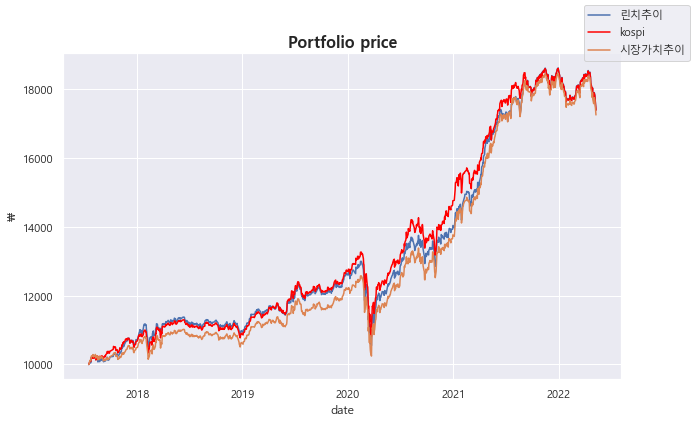

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = r'C:\Users\user\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

pd.options.plotting.backend = "plotly"

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

# df = pd.DataFrame(dict(ss = df_ss['Close'], ts = df_ts['Close']))

fig, ax1 = plt.subplots(figsize=(10,6))

plt.title('Portfolio price', title_font)


ax1.plot(chart[chart.columns.tolist()[0]], label = chart.columns.tolist()[0])

ax1.plot(chart[chart.columns.tolist()[1]], color = 'red', label = chart.columns.tolist()[1])
ax1.plot(chart[chart.columns.tolist()[2]], label = chart.columns.tolist()[2])

ax1.set_xlabel('date')
ax1.set_ylabel('₩')


fig.legend()
fig.show()


# 뉴스지수 

In [195]:
! pip install openpyxl

  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


You should consider upgrading via the 'c:\ai\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [247]:
뉴스지수 = pd.read_excel('./뉴스지수.xslx')
뉴스지수.index = 뉴스지수['index']

In [248]:
뉴스지수

,index,value_x,value_y,변동치,계절조정,변동치_계절조정,뉴스지수,뉴스지수_증가율,뉴스지수_모멘텀,뉴스지수_모멘텀스코어,매수,매도,Date,kospi1
index,,,,,,,,,,,,,,
2006-04-01,2006-04-01,4.00,98.26,4.549688,88.847668,4.466978,97.492837,NaN,NaN,NaN,NaN,NaN,2006-04-01,1415.921000
2006-05-01,2006-05-01,4.00,93.23,4.539016,87.937945,4.485569,97.898593,0.004162,1.0,NaN,NaN,NaN,2006-05-01,1388.834500
2006-06-01,2006-06-01,4.25,90.62,4.532342,89.772047,4.505851,98.341250,0.004522,1.0,NaN,NaN,NaN,2006-06-01,1249.190476
2006-07-01,2006-07-01,4.25,88.53,4.533250,86.478991,4.528756,98.841171,0.005084,1.0,1.0,1.0,NaN,2006-07-01,1277.995000
2006-08-01,2006-08-01,4.50,91.51,4.542617,95.801502,4.554492,99.402864,0.005683,1.0,1.0,NaN,NaN,2006-08-01,1316.084545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,2022-02-01,1.25,103.83,4.654097,107.816777,4.652667,101.545553,-0.002004,0.0,0.0,NaN,NaN,2022-02-01,2724.015000
2022-03-01,2022-03-01,1.25,103.87,4.641693,104.863327,4.641346,101.298453,-0.002433,0.0,0.0,NaN,NaN,2022-03-01,2698.716190
2022-04-01,2022-04-01,1.50,105.00,4.627948,102.173004,4.628106,101.009499,-0.002852,0.0,0.0,NaN,NaN,2022-04-01,2703.242857


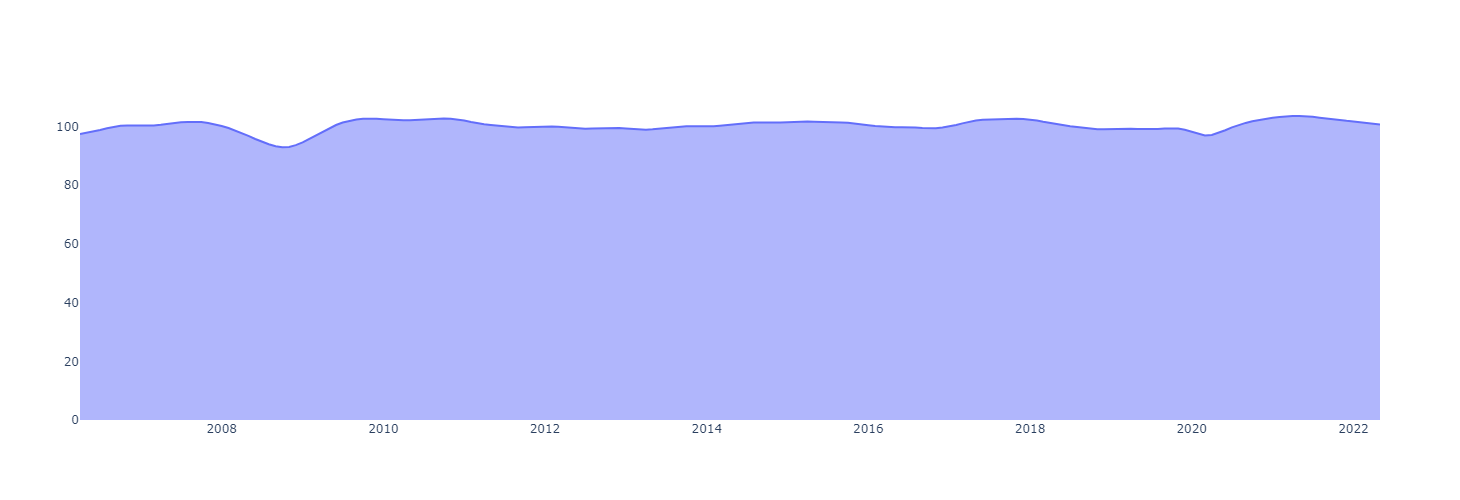

In [264]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=뉴스지수.index, y=뉴스지수['뉴스지수'], fill='tozeroy')) # fill down to xaxis
fig.update_layout(height=600, width=1000,plot_bgcolor="white")

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True,gridwidth=0.01,gridcolor='whitesmoke')
fig.update_layout(height=500, width=1000,legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.2
))


fig.show()

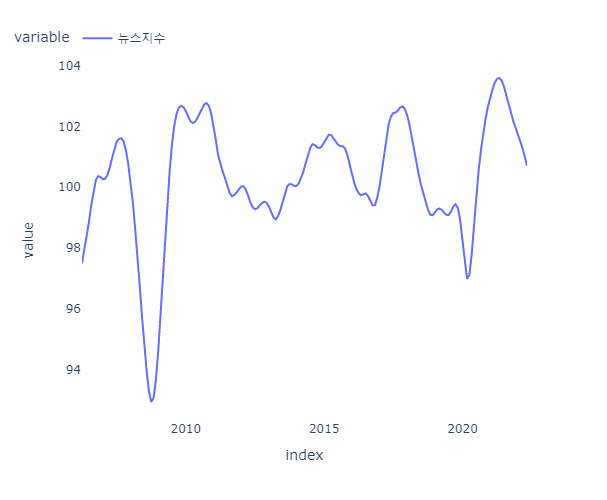

In [272]:

뉴스지수 = pd.read_excel('./뉴스지수.xslx')
뉴스지수.index = 뉴스지수['index']
fig = 뉴스지수['뉴스지수'].plot()
fig.update_layout(height=600, width=1000,plot_bgcolor="white")

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True,gridwidth=0.01,gridcolor='whitesmoke')
fig.update_layout(barmode='stack')
fig.update_layout(height=500, width=1000,legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.2
))

In [266]:
def 뉴스지수(뉴스지수):

    뉴스지수 = pd.read_excel('./뉴스지수.xslx')
    뉴스지수.index = 뉴스지수['index']
    fig = 뉴스지수['뉴스지수'].plot()
    fig.update_layout(height=600, width=1000,plot_bgcolor="white")

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=True,gridwidth=0.01,gridcolor='whitesmoke')
    fig.update_layout(barmode='stack')
    fig.update_layout(height=500, width=1000,legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=0.2
    ))
    graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    
    
    return graphJSON




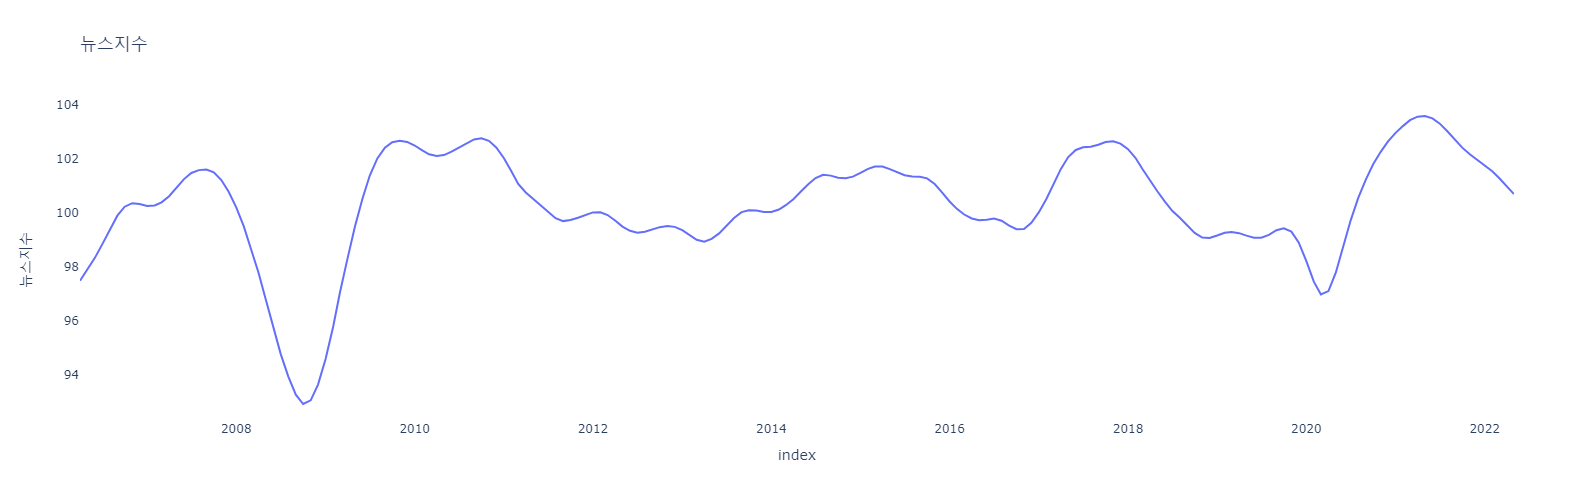